# Explore here

In [10]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt


# load the .env file variables
load_dotenv()

True

In [4]:
# obtain the client ID and Secret from the .env file
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [5]:
# connect with the spotify API
spotify_connect = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret), requests_timeout=25)

In [6]:
# Get the top 10 of your favorite artist's songs. Keep the tracks element, which will contain the most played songs of the artist, 
# keep the name of the song, the popularity and the duration (in minutes).

sza_uri = '7tYKF4w9nC0nq9CsPZTHyP'
sza_data = spotify_connect.artist_top_tracks(sza_uri, country='US')
top_tracks = []

for i, track in enumerate(sza_data['tracks'][:10], 1):
    track_info = {
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': round(track['duration_ms'] / 60000, 2)
    }
    top_tracks.append(track_info)

    print(f"{i}. {track['name']}, popularity: {track['popularity']}, duration: {round(track['duration_ms'] / 60000, 2)}")

1. luther (with sza), popularity: 88, duration: 2.96
2. BMF, popularity: 89, duration: 3.01
3. Kill Bill, popularity: 85, duration: 2.57
4. Snooze, popularity: 87, duration: 3.36
5. All The Stars (with SZA), popularity: 87, duration: 3.87
6. Saturn, popularity: 81, duration: 3.1
7. 30 For 30 (with Kendrick Lamar), popularity: 86, duration: 4.64
8. Nobody Gets Me, popularity: 85, duration: 3.01
9. Open Arms (feat. Travis Scott), popularity: 81, duration: 3.99
10. Kiss Me More (feat. SZA), popularity: 81, duration: 3.48


In [13]:
# Convert to a DataFrame.
top_tracks_df = pd.DataFrame(top_tracks)
print(top_tracks_df)

                              name  popularity  duration_min
0                luther (with sza)          88          2.96
1                              BMF          89          3.01
2                        Kill Bill          85          2.57
3                           Snooze          87          3.36
4         All The Stars (with SZA)          87          3.87
5                           Saturn          81          3.10
6  30 For 30 (with Kendrick Lamar)          86          4.64
7                   Nobody Gets Me          85          3.01
8   Open Arms (feat. Travis Scott)          81          3.99
9         Kiss Me More (feat. SZA)          81          3.48


In [14]:
# Sort the songs by increasing popularity and display the resulting top 3.
top_traks_df = top_tracks_df.sort_values(by='popularity', ascending=False)
print(top_tracks_df.head(3))


                name  popularity  duration_min
0  luther (with sza)          88          2.96
1                BMF          89          3.01
2          Kill Bill          85          2.57


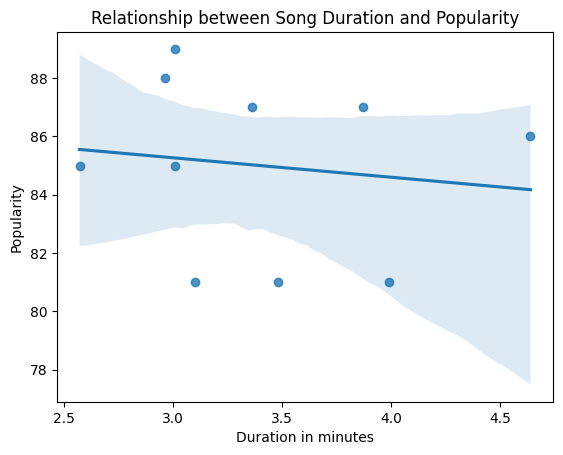

In [15]:
# Does duration have a relationship with popularity? 
# Are shorter songs more popular than longer songs? 
# Analyze it by plotting a scatter plot

sns.regplot(x=top_tracks_df['duration_min'], y=top_tracks_df['popularity'], scatter=True)
plt.title('Relationship between Song Duration and Popularity')
plt.xlabel('Duration in minutes')
plt.ylabel('Popularity')
plt.show()



The scatterplot does not suggest a strong relationship between the duration of a song and its popularity, therefore I could not say definitively that shorter songs are more popular than longer songs. There is however a slight downward trend in popularity as the duration of a song increases.